In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

<Axes: >

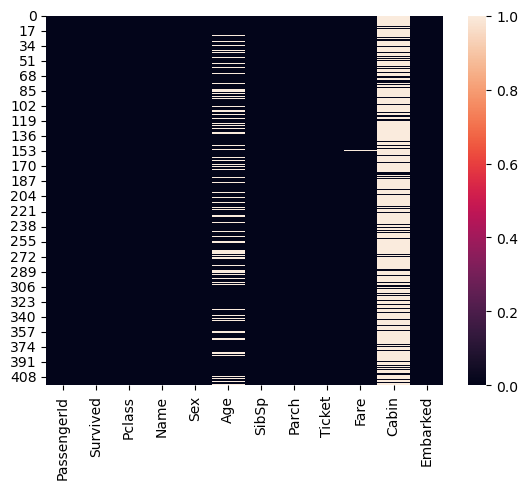

In [6]:
data=pd.read_csv("titanic.csv")
data.columns
sns.heatmap(data.isnull())

In [3]:

data.groupby(["Survived"]).Survived.count()


Survived
0    266
1    152
Name: Survived, dtype: int64

In [4]:
data=data[["Survived","Pclass","Sex","Age"]]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
data.dropna(axis=0,inplace=True)
data.loc[:,"Sex"].replace(["female","male"],[0,1],inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 332 entries, 0 to 415
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  332 non-null    int64  
 1   Pclass    332 non-null    int64  
 2   Sex       332 non-null    int64  
 3   Age       332 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 13.0 KB


C:\Users\papew\AppData\Local\Temp\ipykernel_10472\1124533404.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(axis=0,inplace=True)
C:\Users\papew\AppData\Local\Temp\ipykernel_10472\1124533404.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:,"Sex"].replace(["female","male"],[0,1],inplace=True)


In [6]:
color=[]
for index,value in data.iterrows():
    if (value["Sex"]==1):
        color.append("green")
    else:
        color.append("orange")
len(color)

332

Text(0.5, 1.0, 'age')

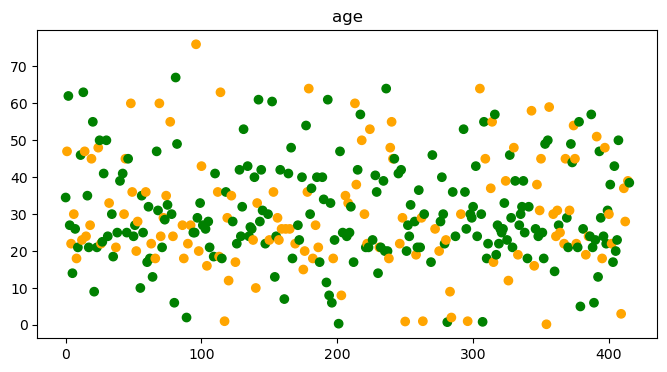

In [7]:
plt.figure(figsize=(8,4))
plt.scatter(data.index,data["Age"],c=color)
plt.title("age")

In [8]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()

In [9]:
y=data["Survived"]
X=data.drop("Survived",axis=1)
model.fit(X,y)
model.score(X,y)

0.9457831325301205

In [10]:
def survie(model,pclass,sex,age):
    x=np.array([[pclass,sex,age]])
    print(model.predict(x))
    print(model.predict_proba(x))
    
survie(model,1,0,12)


[0]
[[0.6 0.4]]


C:\Users\papew\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\papew\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


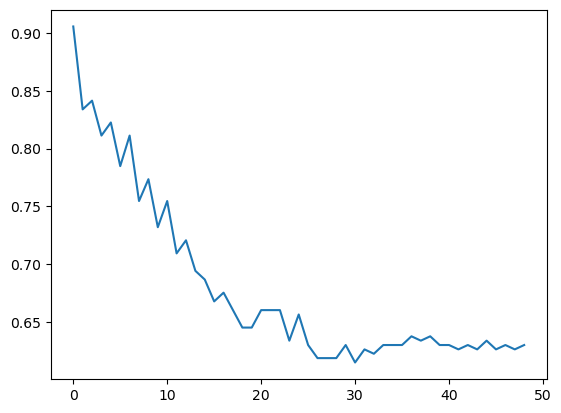

In [11]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
val_score=[]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
for k in range(1,50):
    score=cross_val_score(KNeighborsClassifier(k),X_train,y_train,cv=5).mean()
    val_score.append(score)
plt.plot(val_score)

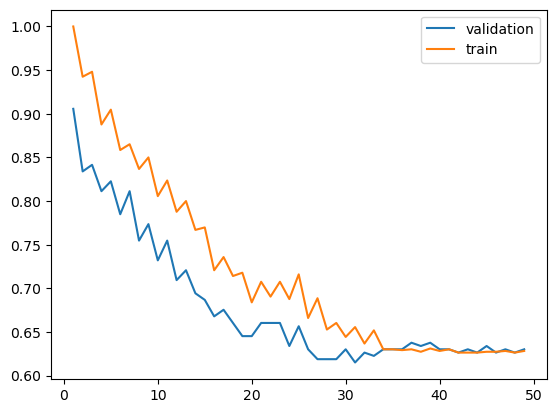

In [22]:
from sklearn.model_selection import validation_curve
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

model1 = KNeighborsClassifier()
k = np.arange(1, 50)

train_score, valid_score = validation_curve(
    model1, X_train, y_train,param_name='n_neighbors', param_range=k, cv=5
)
plt.plot(k,valid_score.mean(axis=1),label="validation")
plt.plot(k,train_score.mean(axis=1),label="train")

plt.legend()


In [34]:
from sklearn.model_selection import GridSearchCV

param_grid={
    "n_neighbors":np.arange(1,20),
    "metric":["euclidean","manhattan"]
}

grid=GridSearchCV(KNeighborsClassifier(),param_grid,cv=5)

grid.fit(X_train,y_train)

grid.best_score_

grid.best_params_

model=grid.best_estimator_

model.score(X_test,y_test)

0.8955223880597015

In [36]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,model.predict(X_test))

array([[38,  1],
       [ 6, 22]], dtype=int64)

[]

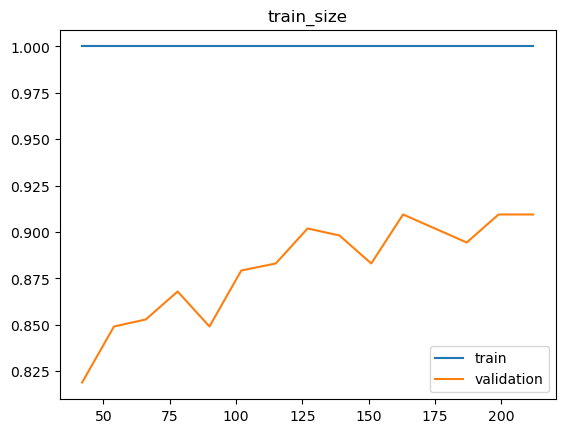

In [44]:
from sklearn.model_selection import learning_curve

N,train_score,valid_score=learning_curve(model,X_train,y_train,train_sizes=np.linspace(0.2,1,15),cv=5)

plt.plot(N,train_score.mean(axis=1),label="train")
plt.plot(N,valid_score.mean(axis=1),label="validation")

plt.legend()
plt.title('train_size')

plt.plot()